# Набор данных об эмоциях

*О наборе данных*

Набор данных для задач распознавания эмоциональной окраски текстов
На вход подаётся текст сообщения, а на выходе модель должна определить одну из шести базовых эмоций, выраженных в тексте
Все данные уже предобработаны в соответствии с методикой, описанной авторами исследования.

*Характеристики:*

Текст сообщения
Метка: целевой признак, обозначает эмоциональную окраску текста


*Метки:*

Sadness (Печаль) 0

Joy (Радость) 1

Love (Любовь) 2

Anger (Гнев) 3

Fear (Страх) 4

Surprise (Удивление) 5

*Цели испозования:*

Датасет предназначен для обучения моделей распознавания эмоциональной окраски текста

Основные задачи, которые можно решить с его помощью:
Классификация текстов по эмоциям,
Анализ чувств пользователей (Sentiment Analysis),
Мониторинг обратной связи клиентов,
Социальные исследования и анализ настроений в социальных сетях

[Ссылка на датасет](https://www.kaggle.com/datasets/parulpandey/emotion-dataset/data)


# 1. Анализ данных датасета

In [3]:
def coolPrinting(title, data):
    print(f"\n --- {title} --- \n")
    print(data)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import f1_score

train_path = './dataset/training.csv'
test_path = './dataset/test.csv'
validation_path = './dataset/validation.csv'

# Загрузка датасетов
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
validation_df = pd.read_csv(validation_path)

coolPrinting("Training Dataset (первые 5 записей)", train_df.head())
coolPrinting("Test Dataset (первые 5 записей)", test_df.head())
coolPrinting("Validation Dataset (первые 5 записей)", validation_df.head())

# Проверка на пропуски
train_missing = train_df.isnull().sum()
test_missing = test_df.isnull().sum()
validation_missing = validation_df.isnull().sum()

coolPrinting("Пропущенные значения в Training Dataset", train_missing)
coolPrinting("Пропущенные значения в Test Dataset", test_missing)
coolPrinting("Пропущенные значения в Validation Dataset", validation_missing)

# Подсчет количества записей для каждой эмоции в каждом датасете
train_emotion_counts = train_df['label'].value_counts()
test_emotion_counts = test_df['label'].value_counts()
validation_emotion_counts = validation_df['label'].value_counts()

coolPrinting("Количество записей для каждой эмоции в Training Dataset", train_emotion_counts)
coolPrinting("Количество записей для каждой эмоции в Test Dataset", test_emotion_counts)
coolPrinting("Количество записей для каждой эмоции в Validation Dataset", validation_emotion_counts)

# Анализ длины текстов в каждом датасете
train_text_length = train_df['text'].apply(len).describe()
test_text_length = test_df['text'].apply(len).describe()
validation_text_length = validation_df['text'].apply(len).describe()

coolPrinting("Длина текстов в Training Dataset", train_text_length)
coolPrinting("Длина текстов в Test Dataset", test_text_length)
coolPrinting("Длина текстов в Validation Dataset", validation_text_length)


 --- Training Dataset (первые 5 записей) --- 

                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3

 --- Test Dataset (первые 5 записей) --- 

                                                text  label
0  im feeling rather rotten so im not very ambiti...      0
1          im updating my blog because i feel shitty      0
2  i never make her separate from me because i do...      0
3  i left with my bouquet of red and yellow tulip...      1
4    i was feeling a little vain when i did this one      0

 --- Validation Dataset (первые 5 записей) --- 

                                                text  label
0  im feeling quite sad and sorry for myself but ...      0
1  i feel like i a

C:\Users\mimim\AppData\Local\Temp\ipykernel_15320\775814136.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_emotion_counts.index, y=train_emotion_counts.values, palette='muted')
C:\Users\mimim\AppData\Local\Temp\ipykernel_15320\775814136.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=test_emotion_counts.index, y=test_emotion_counts.values, palette='muted')
C:\Users\mimim\AppData\Local\Temp\ipykernel_15320\775814136.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=validation_emotion_counts.index, y=validation_emotion

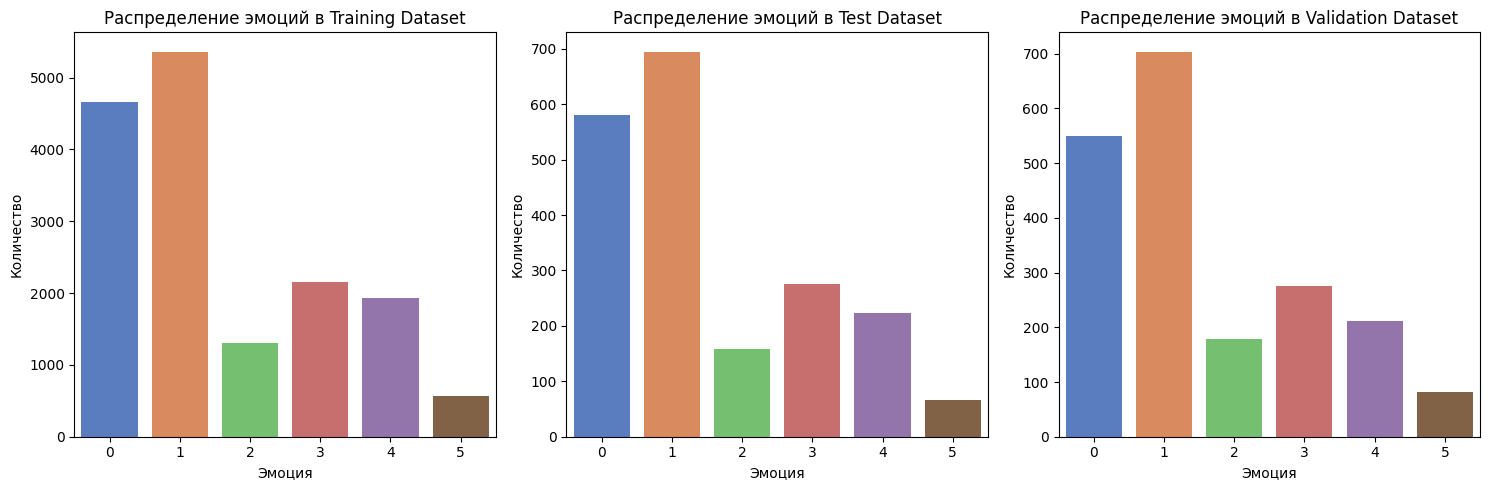

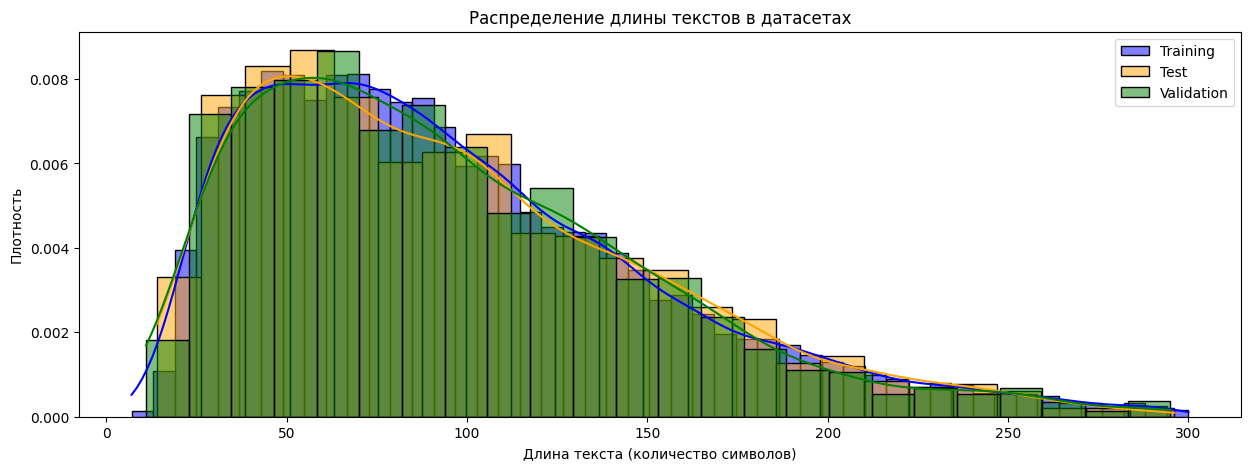

In [5]:
# Визуализация распределения меток
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x=train_emotion_counts.index, y=train_emotion_counts.values, palette='muted')
plt.title('Распределение эмоций в Training Dataset')
plt.xlabel('Эмоция')
plt.ylabel('Количество')

plt.subplot(1, 3, 2)
sns.barplot(x=test_emotion_counts.index, y=test_emotion_counts.values, palette='muted')
plt.title('Распределение эмоций в Test Dataset')
plt.xlabel('Эмоция')
plt.ylabel('Количество')

plt.subplot(1, 3, 3)
sns.barplot(x=validation_emotion_counts.index, y=validation_emotion_counts.values, palette='muted')
plt.title('Распределение эмоций в Validation Dataset')
plt.xlabel('Эмоция')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()

# Визуализация распределения длины текстов
plt.figure(figsize=(15, 5))

sns.histplot(train_df['text'].apply(len), color='blue', label='Training', kde=True, stat='density')
sns.histplot(test_df['text'].apply(len), color='orange', label='Test', kde=True, stat='density')
sns.histplot(validation_df['text'].apply(len), color='green', label='Validation', kde=True, stat='density')

plt.title('Распределение длины текстов в датасетах')
plt.xlabel('Длина текста (количество символов)')
plt.ylabel('Плотность')
plt.legend()
plt.show()


Все 3 датасета сбалансированы и распределены равномерно, для каждого сообщения определены метки класса, в каждом датасете представлены разные типы сообщений
Можно приступать к построению моделей

# 2. Построение моделей

Для решения задачи выбрать 3 модели. Минимум одна модель – классическое машинное обучение. Минимум одна модель – глубокий/нейросетевой подход. Выбрать функцию потерь. Выбрать критерии качества решения задачи. Произвести тренировку моделей. Выбрать наилучший.

**№1 Модель классического ML наивный Баес**

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_train = train_df['label']
X_train = train_df['text']

y_test = test_df['label']
X_test = test_df['text']

X_valid = validation_df['text']
y_valid = validation_df['label']

vectorizer = TfidfVectorizer(max_features=1050) # Преобразование текста в векторы для определения важности слов
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
X_valid_tfidf = vectorizer.transform(X_valid)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Оценка модели
y_pred = model.predict(X_test_tfidf)
coolPrinting("Отчет о классификации", classification_report(y_test, y_pred, zero_division=0))
coolPrinting("Матрица неточностей", confusion_matrix(y_test, y_pred))
coolPrinting("Точность модели", accuracy_score(y_test, y_pred))
f1_nb = f1_score(y_test, y_pred, average='weighted')
coolPrinting("F1-мера для модели Наивного Байеса", f1_nb)

# Оценка модели на валидирующей выборке
y_pred_val = model.predict(X_valid_tfidf)
coolPrinting("Отчет о классификации на валидирующей выборке", classification_report(y_valid, y_pred_val))
coolPrinting("Матрица неточностей", confusion_matrix(y_valid, y_pred_val))
coolPrinting("Точность модели", accuracy_score(y_valid, y_pred_val))

with open('models_saved/modelNB.pkl', 'wb') as file:
    pickle.dump(model, file)


 --- Отчет о классификации --- 

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       581
           1       0.72      0.98      0.83       695
           2       0.93      0.32      0.48       159
           3       0.90      0.62      0.74       275
           4       0.89      0.59      0.71       224
           5       1.00      0.06      0.11        66

    accuracy                           0.79      2000
   macro avg       0.88      0.58      0.62      2000
weighted avg       0.82      0.79      0.76      2000


 --- Матрица неточностей --- 

[[537  37   0   6   1   0]
 [ 10 680   4   1   0   0]
 [ 16  89  51   3   0   0]
 [ 48  53   0 171   3   0]
 [ 42  42   0   7 133   0]
 [ 12  37   0   1  12   4]]

 --- Точность модели --- 

0.788

 --- F1-мера для модели Наивного Байеса --- 

0.7626871259966918

 --- Отчет о классификации на валидирующей выборке --- 

              precision    recall  f1-score   support

           0   

**№2 Модель на основе метода опорных векторов (SVC)**

In [7]:
from sklearn.svm import SVC

y_train = train_df['label']
X_train = train_df['text']

y_test = test_df['label']
X_test = test_df['text']

X_valid = validation_df['text']
y_valid = validation_df['label']

vectorizer = TfidfVectorizer(max_features=2000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
X_valid_tfidf = vectorizer.transform(X_valid)

model = SVC(kernel='linear')
model.fit(X_train_tfidf, y_train)

# Оценка модели
y_pred = model.predict(X_test_tfidf)
coolPrinting("Отчет о классификации", classification_report(y_test, y_pred))
coolPrinting("Матрица неточностей", confusion_matrix(y_test, y_pred))
coolPrinting("Точность модели", accuracy_score(y_test, y_pred))
f1_svc = f1_score(y_test, y_pred, average='weighted')
coolPrinting("F1-мера для модели SVC", f1_svc)

# Оценка на валидирующей выборке
y_pred_val = model.predict(X_valid_tfidf)
coolPrinting("Отчет о классификации на валидирующей выборке", classification_report(y_valid, y_pred_val))
coolPrinting("Матрица неточностей", confusion_matrix(y_valid, y_pred_val))
coolPrinting("Точность модели", accuracy_score(y_valid, y_pred_val))

with open('models_saved/modelSVC.pkl', 'wb') as file:
    pickle.dump(model, file)


 --- Отчет о классификации --- 

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       581
           1       0.88      0.94      0.91       695
           2       0.82      0.70      0.76       159
           3       0.90      0.86      0.88       275
           4       0.84      0.88      0.86       224
           5       0.72      0.55      0.62        66

    accuracy                           0.88      2000
   macro avg       0.85      0.81      0.82      2000
weighted avg       0.88      0.88      0.88      2000


 --- Матрица неточностей --- 

[[530  19   4  14  11   3]
 [  7 656  17   4   5   6]
 [  4  42 111   0   1   1]
 [ 18  15   1 237   3   1]
 [ 12   2   2   9 196   3]
 [  0  14   0   0  16  36]]

 --- Точность модели --- 

0.883

 --- F1-мера для модели SVC --- 

0.8809656631420105

 --- Отчет о классификации на валидирующей выборке --- 

              precision    recall  f1-score   support

           0       0.90    

**№3 Нейросетевая модель глубокого обучения**

Epoch 1/10


c:\Users\mimim\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3268 - loss: 1.6310 - val_accuracy: 0.5475 - val_loss: 1.3171
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5444 - loss: 1.2147 - val_accuracy: 0.7875 - val_loss: 0.7702
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7186 - loss: 0.8011 - val_accuracy: 0.8455 - val_loss: 0.5274
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7921 - loss: 0.6073 - val_accuracy: 0.8585 - val_loss: 0.4167
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8203 - loss: 0.5055 - val_accuracy: 0.8690 - val_loss: 0.3749
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8287 - loss: 0.4832 - val_accuracy: 0.8720 - val_loss: 0.3553
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8318 - loss: 0.4456 - val_accuracy: 0.8795 - val_loss: 0.3580
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8481 - loss: 0.4070 - val_accuracy: 0.8800 - val_

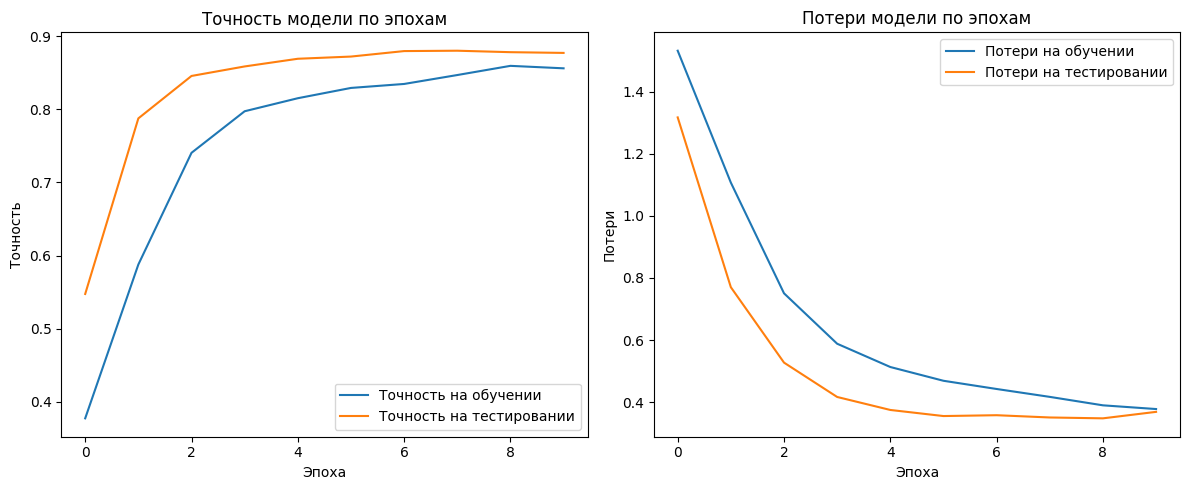

Модель сохранена как model.keras


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

y_train = train_df['label']
X_train = train_df['text']

y_test = test_df['label']
X_test = test_df['text']

y_validation = validation_df['label']
X_validation = validation_df['text']

vectorizer = TfidfVectorizer(max_features=2000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
X_validation_tfidf = vectorizer.transform(X_validation)

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_validation_categorical = to_categorical(y_validation)

# Модель глубокой нейронной сети
model = Sequential([
    Dense(10, input_shape=(X_train_tfidf.shape[1],), activation='relu'),
    Dropout(0.4),
    Dense(10, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])

# Компиляция и обучение модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_tfidf, y_train_categorical, epochs=10, batch_size=32, validation_data=(X_test_tfidf, y_test_categorical))

# Оценка производительности модели
evaluation = model.evaluate(X_test_tfidf, y_test_categorical)
print("Оценка модели (потери и точность)", evaluation)

y_pred = model.predict(X_test_tfidf)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Отчет о классификации", classification_report(y_test, y_pred_classes))
print("Матрица неточности", confusion_matrix(y_test, y_pred_classes))
f1_neuro = f1_score(y_test, y_pred_classes, average='weighted')
coolPrinting("F1-мера для нейросетевой модели", f1_neuro)

evaluation = model.evaluate(X_validation_tfidf, y_validation_categorical)
print("Оценка модели (потери и точность) Валидирующая выборка", evaluation)

# Визуализация графиков точности и потерь
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на тестировании')
plt.title('Точность модели по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Потери на обучении')
plt.plot(history.history['val_loss'], label='Потери на тестировании')
plt.title('Потери модели по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()

plt.tight_layout()
plt.show()

model.save('models_saved/model_neuro.keras')
print("Модель сохранена как model.keras")

# Выводы

MultinomialNB
Точность (Accuracy): 0.779
Precision: Варьируется от 0.72 (класс 1) до 1.00 (класс 5).
Recall: Наиболее высокий (0.98) для класса 1, наименьший (0.06) для класса 5.
F1-score: Наиболее высокий (0.86) для класса 0, наименьший (0.11) для класса 5.

SVC (Support Vector Classifier)
Точность (Accuracy): 0.883
Precision: Варьируется от 0.72 (класс 5) до 0.93 (класс 0).
Recall: Наиболее высокий (0.94) для класса 1, наименьший (0.55) для класса 5.
F1-score: Наиболее высокий (0.92) для класса 0, наименьший (0.62) для класса 5.

Нейросетевая модель:
Точность (Accuracy): 0.885
Precision: Наивысшая точность у класса 1 (0.91), что означает, что 91% предсказаний этого класса были верными. Наименьшая точность у класса 5 (0.72), что указывает на то, что модель ошибается чаще при предсказании этого класса.
Recall: Наивысшая полнота у класса 1 (0.93), что говорит о том, что 93% всех истинных примеров этого класса были правильно предсказаны. Наименьшая полнота у класса 5 (0.52).
F1-score: Наивысший F1-score у класса 1 (0.92), что говорит о сбалансированности между точностью и полнотой. Наименьший F1-score у класса 5 (0.60), что указывает на необходимость улучшения модели для этого класса.

Наилучшие результаты: Нейросетевая модель и Модель SVC показали наилучшие результаты по точности (~0.88) и сбалансированным показателям для всех классов.
Проблемные классы: Все модели испытывают трудности с классом 5, что требует увеличения количества входных данных с более равномерным распределением по классам.
